<a href="https://colab.research.google.com/github/mohameds277/Machine_learning/blob/main/Introduction_to_Deep_Learning_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Deep Learning with PyTorch

Mohamed Shqierat 1190702

The goal of this experiment is to introduce you to deep learning frameworks. There
are many frameworks for deep learning such as TensorFlow, PyTorch, Keras, ... etc.
In this lab you will learn the basics of PyTorch. The reason why we choose PyTorch
is that it is pythonic, easy to learn, and the most pupular framework in academic
communities. This experimet is based on PyTorch tutorials.

PyTorch is a Python-based scientific computing package serving two broad purposes:
a replacement for NumPy to use the power of GPUs and other accelerators, and an
automatic differentiation library that is useful to implement neural networks. It is
primarily developed by Facebook AI Research lab (FAIR).


# 1.1 Tensors

Tensors are a specialized data structure that are very similar to arrays and matrices.
In PyTorch, we use tensors to encode the inputs and outputs of a model, as well
as the model’s parameters. Tensors are similar to NumPy’s ndarrays, except that
tensors can run on GPUs or other specialized hardware to accelerate computing.
Let’s start by importing pytorch and numpy


In [51]:
import torch
import numpy as np

**Tensor Initialization**


Tensors can be initialized in various ways. Take a look at the following examples:


1. Directly from data
Tensors can be created directly from data. The data type is automatically
inferred.

In [52]:
data = [[1, 2], [3, 4]]         # list of lists ( 2 X 2 Matrix )
x_data = torch.tensor(data)     # converts lists of lists into Tensor Data strucutre
print(x_data)


tensor([[1, 2],
        [3, 4]])


2. From a NumPy array
Tensors can be created from NumPy arrays


In [53]:
np_array = np.array(data)
print(np_array)


x_np = torch.from_numpy(np_array)       # ***tensor are  similar to NumPy arrays but have additional capabilities like GPU acceleration.***

print(x_np)

[[1 2]
 [3 4]]
tensor([[1, 2],
        [3, 4]])


3. From another tensor:
The new tensor retains the properties (shape, datatype) of the argument tensor,
unless explicitly overridden.


In [54]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data   ( using the dimension of x_data but with 1 population)

print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data    ( same as x_data matrix dimension but with fload random population)
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.4978, 0.8540],
        [0.7558, 0.7660]]) 



4- With random or constant values:
shape is a tuple of tensor dimensions. In the functions below, it determines the
dimensionality of the output tensor.


In [55]:
#creating tensor with specific shape
shape = (2, 3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)

zeros_tensor = torch.zeros(shape)
print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.1288, 0.1913, 0.5230],
        [0.7776, 0.0972, 0.1850]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


## Tensor Attributes

Tensor attributes describe their shape, datatype, and the device on which they are
stored.


In [56]:
tensor = torch.rand(3, 4)   # populate a tensor of 3X4 matrix with random numbers
print(tensor)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")     # names the running device ( CPU OR GPU )

tensor([[0.1206, 0.9491, 0.7918, 0.9435],
        [0.7063, 0.8431, 0.1646, 0.5455],
        [0.6477, 0.0051, 0.5174, 0.2657]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## Tensor Operations

Over 100 tensor operations, including transposing, indexing, slicing, mathematical
operations, linear algebra, random sampling, and more are described here.
Each of them can be run on the GPU (at typically higher speeds than on a CPU). If
you’re using Colab, allocate a GPU by going to Edit > Notebook Settings.

In [57]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  print("GPU Accelerated ")
  tensor = tensor.to('cuda')
print(f"Device tensor is stored on: {tensor.device}")   # GPU not available


Device tensor is stored on: cpu


Try out some of the operations from the list. If you’re familiar with the NumPy
API, you’ll find the Tensor API a breeze to use.


1. Standard numpy-like indexing and slicing:

In [58]:
tensor = torch.ones(4, 4)    # 4X4 matrix populated with 1s
tensor[:,1] = 0              # modifiy coloumn 1 and populate it with zeros ( simple indexing )
print(tensor)


tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


2- Joining tensors
You can use torch.cat to concatenate a sequence of tensors along a given
dimension. See also torch.stack, another tensor joining op that is subtly
different from torch.cat.

In [59]:
print(tensor)

t1 = torch.cat([tensor, tensor, tensor], dim=1)     # 1 -> horizontal concatenation ( based on columns) concatenate column by column
print(t1)


t1 = torch.cat([tensor, tensor, tensor], dim=0)     #  0 -> vertical concatenation ( based on rows) concatenate row by row
print(t1)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


3. Multiplying tensors

In [60]:
# This computes the element-wise product
print(tensor)



print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


This computes the matrix multiplication between two tensors

In [61]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


4. In-place operations
Operations that have a suffix are in-place. For example: x.copy (y), x.t (),
will change x

In [62]:
print(tensor, "\n")
tensor.add_(5)      # add 5 to every matrix element
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


## Bridge with NumPy

Tensors on the CPU and NumPy arrays can share their underlying memory locations,
and changing one will change the other.
Tensor to NumPy array: A change in the tensor reflects in the NumPy array

In [63]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")
t.add_(1)
print(f"t: {t}")      # changed the tensor , updated the numpy -> same memory locations
print(f"n: {n}")


t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]
t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


NumPy array to Tensor: Changes in the NumPy array reflects in the tensor.

In [64]:
n = np.ones(5)
t = torch.from_numpy(n)
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")


t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]




---



# 1.2 A Gentle Introduction to torch.autograd

torch.autograd is PyTorch’s automatic differentiation engine that powers neural
network training. In this section, you will get a conceptual understanding of how
autograd helps a neural network train.

## Background

Neural networks (NNs) are a collection of nested functions that are executed on some
input data. These functions are defined by parameters (consisting of weights and
biases), which in PyTorch are stored in tensors.

Training a NN happens in two steps:


- Forward Propagation: In forward prop, the NN makes its best guess about the correct
output. It runs the input data through each of its functions to make this guess.

- Backward Propagation: In backprop, the NN adjusts its parameters proportionate to
the error in its guess. It does this by traversing backwards from the output, collecting
the derivatives of the error with respect to the parameters of the functions (gradients), and optimizing the parameters using gradient descent.

## Differentiation in Autograd

Let’s take a look at how autograd collects gradients. We create two tensors a and b
with requires grad=True. This signals to autograd that every operation on them
should be tracked.

In [65]:
import torch
a = torch.tensor([2., 3.], requires_grad=True)
print(a)

b = torch.tensor([6., 4.], requires_grad=True)
print(b)

tensor([2., 3.], requires_grad=True)
tensor([6., 4.], requires_grad=True)


We create another tensor Q from a and b.
Q = 3a^3 − b^2

In [66]:
Q = 3*a**3 - b**2

Let’s assume a and b to be parameters of an NN, and Q to be the error. In NN
training, we want gradients of the error w.r.t. parameters, i.e.
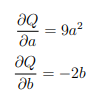

When we call .backward() on Q, autograd calculates these gradients and stores them
in the respective tensors’ .grad attribute.
We need to explicitly pass a gradient argument in Q.backward() because it is a
vector. gradient is a tensor of the same shape as Q, and it represents the gradient
of Q w.r.t. itself, i.e.

dQ /
dQ = 1


Equivalently, we can also aggregate Q into a scalar and call backward implicitly, like
Q.sum().backward().

In [67]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)


Gradients are now deposited in a.grad and b.grad

In [68]:
# check if collected gradients are correct
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


## Task 1
Use autograd to compute the gradients of Y w.r.t. x1 and x2 at the point
(x1, x2) = (1, 1). Where
Y = (3x1 − 2x2 − 2)2
.
Verify your results by computing the gradients analytically

In [69]:
x1 = torch.tensor(1.0, requires_grad=True)
x2 = torch.tensor(1.0, requires_grad=True)


#Function  Y = (3x1 − 2x2 − 2)^2
Y = (3 * x1 - 2 * x2 - 2) ** 2



external_grad = torch.tensor(1.)

Y.backward(gradient=external_grad)



grad_x1 = x1.grad
grad_x2 = x2.grad

print(grad_x1)
print(grad_x2)


# derevative based on x1 -> dy/dx1 = 2(u) -> 2(3x1 - 2x2 - 2 ) * 3 -> substituting x1 and x2 -> 2(3*1 * 2*1 - 2) * 3 =  -6
# derevative based on x2 -> dy/dx2 = 2(u) -> 2(3x1 - 2x2 - 2 ) * -2 -> substituting x1 and x2 -> 2(3*1 * 2*1 - 2) * 3 =  4

print(-6 ==  grad_x1)
print(4 == grad_x2 )



tensor(-6.)
tensor(4.)
tensor(True)
tensor(True)




---



# 1.3 Building Models with PyTorch

Neural networks can be constructed using the torch.nn package. Now that you had
a glimpse of autograd, nn depends on autograd to define models and differentiate
them. An nn.Module contains layers, and a method forward(input) that returns
the output

- Define the neural network that has some learnable parameters (or weights)
- Iterate over a dataset of inputs
- Process input through the network
- Compute the loss (how far is the output from being correct)
- Propagate gradients back into the network’s parameters
- Update the weights of the network, typically using a simple update rule:
weight = weight - learning rate * gradient


For example, look at this network that classifies digit images. It is a simple feedforward network. It takes the input, feeds it through two hidden layers one after the
other, and then finally gives the output, which is 10 neurons each corresponds to a
different class (digit 0, 1, ..., 9).

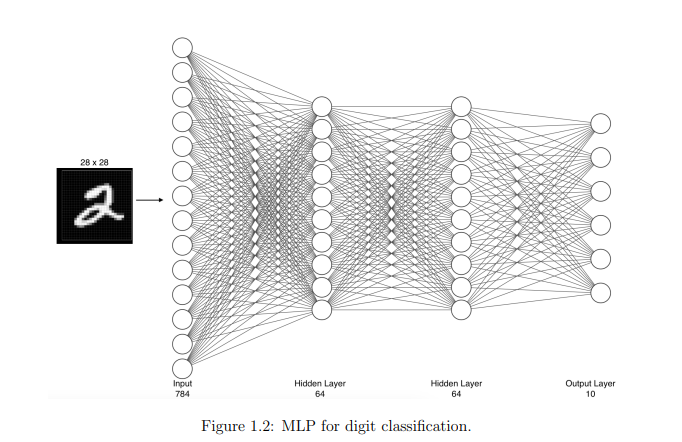

Now, let’s build and train the MLP shown in Figure 1.2.


## **Define the network**


In [70]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

  def __init__(self):
    super(Net, self).__init__()
    # an affine operation: y = Wx + b
    # 784 is the input dimension, and 68 is the output dimenstion of the first hidden layer 7
    self.fc1 = nn.Linear(784, 64)   #  input layer  (L1) :  input dimension ( 28 X 28 ) Layer 1 , output -> 64
    self.fc2 = nn.Linear(64, 64)    #  hidden layer (L2) :  input 64 , output -> 64
    self.fc3 = nn.Linear(64, 10)    #  hidden layer (L3) :  input 64 , output -> 10


  def forward(self, x):
    # apply the first layer with relu activation
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x



In [71]:
net = Net()   # Creating a Network named net
print(net)    # printing the network net layers

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


You just have to define the forward function, and the backward function (where
gradients are computed) is automatically defined for you using autograd. You can
use any of the Tensor operations in the forward function.


The learnable parameters of a model are returned by net.parameters()

In [72]:
params = list(net.parameters())     # listing net network parameters in parmas list

print(len(params))

for p in params:                   # iterating through the parma list to print each parameter
  print(p.size())

6
torch.Size([64, 784])
torch.Size([64])
torch.Size([64, 64])
torch.Size([64])
torch.Size([10, 64])
torch.Size([10])


## Task 2
 Identify what are the parameters that are printed in the previous code.
Let’s try a random input. Note: expected input size of this network is 784.

In [73]:
input = torch.randn(1, 784)   #1 row , 784 column
print(input)



out = net(input)
print(out)


params = list(net.parameters())
print(len(params))
for p in params:
  print(p.size())


tensor([[-1.5644e-01,  2.4422e-01,  6.8366e-01, -2.4237e-01, -1.0256e+00,
          2.6572e+00, -1.5470e+00,  1.9086e+00, -2.1135e+00, -3.2138e-01,
          6.3049e-01,  6.8418e-01,  3.7508e-01,  9.5058e-01, -1.1998e+00,
         -3.2131e-01,  5.6890e-01,  1.0873e+00,  1.5238e+00, -6.6307e-01,
          1.7309e+00,  1.8818e+00, -1.2832e+00, -3.6782e-01,  6.7942e-01,
          1.9930e-01, -1.2761e+00,  1.1912e+00,  7.8500e-01,  2.5205e-02,
          4.2961e-01,  2.2485e+00,  1.4248e+00, -5.3870e-01, -9.5004e-01,
          1.4138e+00, -1.8552e+00,  6.2149e-01,  4.3469e-01,  1.6151e+00,
          6.6686e-01,  4.1813e-01,  1.1852e+00,  1.0959e+00,  2.0043e-01,
          7.4349e-01,  2.2146e+00, -1.6097e-01,  3.1470e-01,  5.2031e-01,
          2.9555e-02,  1.1213e+00, -3.7765e-01,  4.7366e-01, -3.1514e-02,
          1.3454e+00, -6.9572e-01,  6.8218e-01, -9.6367e-02, -2.2325e-01,
         -1.2152e+00,  1.1081e+00,  2.0107e-01, -2.6610e+00, -4.7480e-02,
         -2.5967e+00,  8.0613e-01,  2.

The output is the same as above , meaning that the input is suitable for the network

Note that torch.nn only supports mini-batches. The entire torch.nn package only
supports inputs that are a mini-batch of samples, and not a single sample. That’s
the reason why we add an additional dimension for the input tensor.

## Task 3
Try the previous network with a random mini-batch of size 4 and print its
output.

In [74]:
input_mini_4 = torch.randn(4 , 784)   # creating a random mini 4 batch


output_mini_4 = net(input_mini_4)     # assiging the mini batch as an input to the network net


print(output_mini_4)                  # printing the output



params = list(net.parameters())
print(len(params))
for p in params:
  print(p.size())


tensor([[-0.1394, -0.2436,  0.0619, -0.0943,  0.0694,  0.3372, -0.1682,  0.0910,
          0.0170,  0.0817],
        [-0.1516, -0.1006,  0.0338, -0.1767,  0.0737,  0.0936, -0.1834,  0.0343,
         -0.0476,  0.0548],
        [-0.0227, -0.1501,  0.0487, -0.0653,  0.0297,  0.2543, -0.2369, -0.0262,
          0.0949, -0.0878],
        [-0.1717, -0.0652,  0.0836, -0.0495,  0.0033,  0.1794, -0.2340, -0.0024,
          0.0192,  0.0486]], grad_fn=<AddmmBackward0>)
6
torch.Size([64, 784])
torch.Size([64])
torch.Size([64, 64])
torch.Size([64])
torch.Size([10, 64])
torch.Size([10])


## Define a Loss function and optimizer

As we have a classification task, let’s use a Classification Cross-Entropy (CE) loss,
where





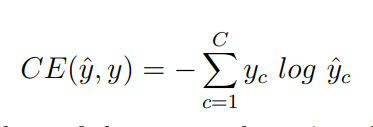

where y is the one-hot encoding of the target class, ˆy is the predicted probabilities of
the network, and C is the number of classes.
For the optimizer, we will use a simple stochastic gradient descent (SGD) optimizer,
which has a simple update rule: weight = weight - learning rate * gradient

In [75]:
import torch.optim as optim

loss = nn.CrossEntropyLoss()       # loss fucntion setup with Cross Entropy Loss ( calculates the difference between the predicted output (logits) of the network and the actual labels (target classes)


optimizer = optim.SGD(net.parameters(), lr=0.001)     # optimizer setup with learning rate set to 0.001
# used for updating the weights and biases of the network





Note that the input to nn.CrossEntropyLoss() is expected to contain the unnormalized logits for each class. That’s why we do not use softmax activation for the
last layer of the network.


**What about data?**

To train the network, you need to iterate over your dataset and feed it to the network
as mini-batches in the training loop. PyTorch provides two classes to make this
process easier: Dataset and Dataloader. The Dataset and DataLoader classes
encapsulate the process of pulling your data from storage and exposing it to your
training loop in batches.
The Dataset is responsible for accessing and processing single instances of data. The
DataLoader pulls instances of data from the Dataset (either automatically or with a
sampler that you define), collects them in batches, and returns them for consumption
by your training loop. The DataLoader works with all kinds of datasets, regardless
of the type of data they contain.
PyTorch domain libraries provide a number of pre-loaded datasets (such as MNIST)
that subclass torch.utils.data.Dataset and implement functions specific to the
particular data. They can be used to prototype and benchmark your model. In this
experiment, we will use the MNIST dataset, which contains images of handwritten
digits. It has a training set of 60,000 examples, and a test set of 10,000 examples.
Each example comprises a 28×28 grayscale image and an associated label from one
of 10 classes (digit 0, 1, ..., 9).


## **Loading a Dataset**

Here is an example of how to load the MNIST dataset from TorchVision.
We load the MNIST Dataset with the following parameters:



-  root is the path where the train/test data is stored.

- train specifies training or test dataset.
- download=True downloads the data from the internet if it’s not available at
root.
- transform and target transform specify the feature and label transformations.



In [76]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.MNIST(
root="data",              # path where the data is stored
train=True,               # type of data ( true for training  | false for  testing  )
download=True,            # download to the current machine
transform=ToTensor()      # performing transformation on the loaded data set like  normalization, scaling, cropping
)


test_data = datasets.MNIST(
root="data",
train=False,
download=True,
transform=ToTensor()
)


## **Iterating and Visualizing the Dataset**

We can index Datasets manually like a list: training data[index]. We use matplotlib
to visualize some samples in our training data.

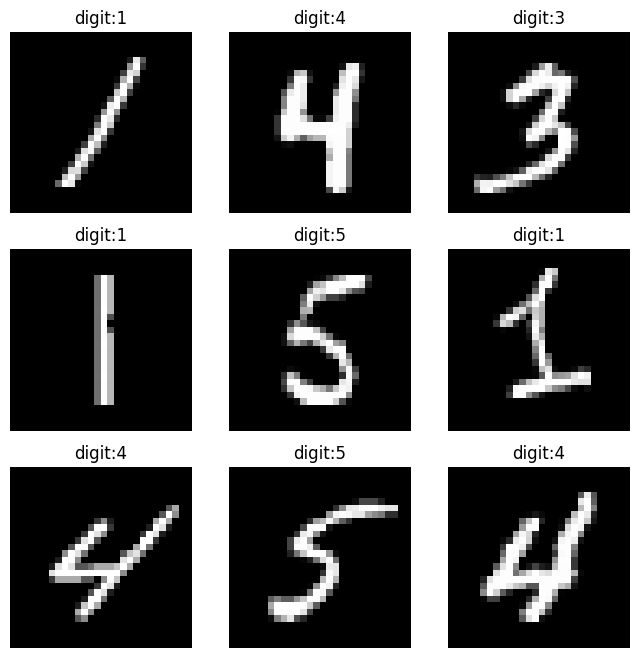

In [77]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()    # picking a random sample from the dataset
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title("digit:" + str(label))
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## **Preparing your data for training with DataLoaders**



The Dataset retrieves our dataset’s features and labels one sample at a time. While
training a model, we typically want to pass samples in “minibatches”, reshuffle the
data at every epoch to reduce model overfitting, and use Python’s multiprocessing
to speed up data retrieval.
DataLoader is an iterable that abstracts this complexity for us in an easy API.

In [78]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=4, shuffle=True)
print(len(training_data))
print(len(train_dataloader))

test_dataloader = DataLoader(test_data, batch_size=4, shuffle=True)

60000
15000


## **Iterate through the DataLoader**

We have loaded that dataset into the DataLoader and can iterate through the dataset
as needed. Each iteration below returns a batch of train features and train labels
(containing batch size=4 features and labels respectively). Because we specified
shuffle=True, after we iterate over all batches the data is shuffled.


Feature batch shape: torch.Size([4, 1, 28, 28])
Labels batch shape: torch.Size([4])


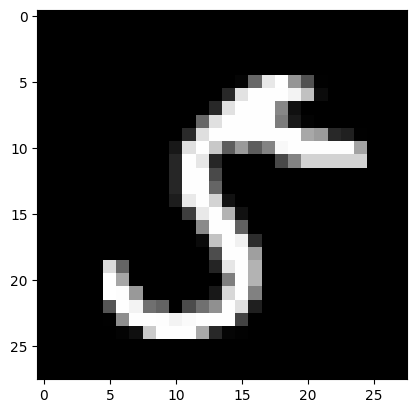

Label: 5


In [79]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))

print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## Train the network


In [80]:
for epoch in range(2): # loop over the dataset multiple times
  running_loss = 0.0
  for i, data in enumerate(train_dataloader, 0):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data
    # zero the parameter gradients
    optimizer.zero_grad()
    # forward + backward + optimize
    outputs = net(torch.flatten(inputs,1))
    iteration_loss = loss(outputs, labels)
    iteration_loss.backward()
    optimizer.step()
    # print statistics
    running_loss += iteration_loss.item()
    if i % 2000 == 1999: # print every 2000 mini-batches
      print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
      running_loss = 0.0
print('Finished Training')


[1,  2000] loss: 2.288
[1,  4000] loss: 2.205
[1,  6000] loss: 1.964
[1,  8000] loss: 1.451
[1, 10000] loss: 0.986
[1, 12000] loss: 0.749
[1, 14000] loss: 0.627
[2,  2000] loss: 0.518
[2,  4000] loss: 0.494
[2,  6000] loss: 0.451
[2,  8000] loss: 0.408
[2, 10000] loss: 0.396
[2, 12000] loss: 0.399
[2, 14000] loss: 0.398
Finished Training




---



## Task 4
What is the meaning of epoch, forward pass, backward pass. What is
the effect of torch.flatten(inputs, 1), and optimizer.step()?




---



**Epoch is like the number of the current iteration of the data set batch , where the number of Epoch indicates how many time the model or network gets to train from the dataset**

**forward pass is the operation of sending the input into the network to obtain sight on the predicitons , the operation involves in passing the weight and biase into the activiation function and the output of this fucntion is the prediciton output of the network.**

**Backward pass (Backpropagation) is  a process to compute the gradient or change of the network parameters ( weight and biase ) in order to update them through the training process , this process starts with computing the loss fucntion , then the process keeps going backward , this process is important for adjusting the parameters through the training process .**

**effects of torch.flatten(inputs, 1) : this proceds the forward pass by passing into the created netowrk net a flattened input starting with second dimenstion  , to recive a output prediction .**

**effects of optimizer.step() : is updating the network parameters ( weights and biases ) based on the result of the gradient from the backward pass .**



---



To save our trained model, we can use the following code:


In [81]:
PATH = './my_net.pth'
torch.save(net.state_dict(), PATH)

In [82]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

Let’s look at how the network performs on the whole testing dataset

We have trained the network for 2 passes over the training dataset. But we need to
check if the network has learnt anything at all.
We will check this by predicting the class label that the neural network outputs, and
checking it against the ground-truth. If the prediction is correct, we add the sample
to the list of correct predictions. The outputs are energies for the 10 classes. The
higher the energy for a class, the more the network thinks that the image is of the
particular class. So, we get the prediction by finding the index of the highest energy.
Let’s load back in our saved model (note: saving and re-loading the model wasn’t
necessary here, we only did it to illustrate how to do so):


**Test the network on the test data**


In [83]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
  for data in test_dataloader:
    images, labels = data
    # calculate outputs by running images through the network
    outputs = net(torch.flatten(images,1))
    # the class with the highest energy is what we choose as prediction
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print(f'Accuracy of the network on the 10000 test images: {100 * correct// total} %')

Accuracy of the network on the 10000 test images: 89 %


## Task 5
 Train the network in the previous example, but instead of using 2 hidden
layers, try 3 hidden layers.


In [105]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

  def __init__(self):
    super(Net, self).__init__()
    # an affine operation: y = Wx + b
    # 784 is the input dimension, and 68 is the output dimenstion of the first hidden layer 7
    self.fc1 = nn.Linear(784, 128)   #  input layer  (L1) :  input dimension ( 28 X 28 ) Layer 1 , output -> 64
    self.fc2 = nn.Linear(128, 64)    #  hidden layer (L2) :  input 64 , output -> 64
    self.fc3 = nn.Linear(64 , 32)   #  hidden layer (L3) :  input 64 , output -> 10
    self.fc4 = nn.Linear(32, 10)    #  hidden layer (L4) :  input 64 , output -> 10


  def forward(self, x):
    # apply the first layer with relu activation
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)

    return x



In [106]:
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=10, bias=True)
)


In [107]:
for epoch in range(2): # loop over the dataset multiple times
  running_loss = 0.0
  for i, data in enumerate(train_dataloader, 0):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data
    # zero the parameter gradients
    optimizer.zero_grad()
    # forward + backward + optimize
    outputs = net(torch.flatten(inputs,1))
    iteration_loss = loss(outputs, labels)
    iteration_loss.backward()
    optimizer.step()
    # print statistics
    running_loss += iteration_loss.item()
    if i % 2000 == 1999: # print every 2000 mini-batches
      print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
      running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 2.306
[1,  4000] loss: 2.307
[1,  6000] loss: 2.306
[1,  8000] loss: 2.306
[1, 10000] loss: 2.306
[1, 12000] loss: 2.306
[1, 14000] loss: 2.305
[2,  2000] loss: 2.305
[2,  4000] loss: 2.305
[2,  6000] loss: 2.306
[2,  8000] loss: 2.307
[2, 10000] loss: 2.307
[2, 12000] loss: 2.306
[2, 14000] loss: 2.307
Finished Training


In [108]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
  for data in test_dataloader:
    images, labels = data
    # calculate outputs by running images through the network
    outputs = net(torch.flatten(images,1))
    # the class with the highest energy is what we choose as prediction
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print(f'Accuracy of the network on the 10000 test images: {100 * correct// total} %')

Accuracy of the network on the 10000 test images: 9 %


the accuracy of 3 hidden layer network is significantly poor comapring with 2 hidden layer, I tried to increase the number of epochs to and 5 and 10 but the results are the same.

## Task 6
Train the network in the previous example using Adam optimizer.

In [109]:
optimizer = optim.Adam(net.parameters(), lr=0.001)

loss_function = nn.CrossEntropyLoss()



In [110]:
for epoch in range(2): # loop over the dataset multiple times
  running_loss = 0.0
  for i, data in enumerate(train_dataloader, 0):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data
    # zero the parameter gradients
    optimizer.zero_grad()
    # forward + backward + optimize
    outputs = net(torch.flatten(inputs,1))
    iteration_loss = loss(outputs, labels)
    iteration_loss.backward()
    optimizer.step()
    # print statistics
    running_loss += iteration_loss.item()
    if i % 2000 == 1999: # print every 2000 mini-batches
      print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
      running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 0.569
[1,  4000] loss: 0.283
[1,  6000] loss: 0.221
[1,  8000] loss: 0.177
[1, 10000] loss: 0.165
[1, 12000] loss: 0.161
[1, 14000] loss: 0.157
[2,  2000] loss: 0.124
[2,  4000] loss: 0.121
[2,  6000] loss: 0.114
[2,  8000] loss: 0.118
[2, 10000] loss: 0.107
[2, 12000] loss: 0.106
[2, 14000] loss: 0.106
Finished Training


In [111]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
  for data in test_dataloader:
    images, labels = data
    # calculate outputs by running images through the network
    outputs = net(torch.flatten(images,1))
    # the class with the highest energy is what we choose as prediction
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print(f'Accuracy of the network on the 10000 test images: {100 * correct// total} %')

Accuracy of the network on the 10000 test images: 97 %


the adam optimizer made a great improvements in the loss function , before using it the average was 2.3 with it the average become 0.5





---






## Training on GPU

The training in the previous example was done on CPU. But how do we train our
model on GPU?
Just like how you transfer a Tensor onto the GPU, you transfer the neural net onto
the GPU. Let’s first define our device as the first visible cuda device if we have CUDA
available:

In [113]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)


cpu


The rest of this section assumes that device is a CUDA device.
Then these methods will recursively go over all modules and convert their parameters
and buffers to CUDA tensors:

In [114]:
net.to(device)


Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=10, bias=True)
)

Remember that you will have to send the inputs and targets at every step to the
GPU too:


In [115]:
inputs, labels = data[0].to(device), data[1].to(device)


##Task 7
Train the network in the previous example on GPU. Do you notice significant
speedup? if not, try to increase the size of your network

In [116]:
for epoch in range(2): # loop over the dataset multiple times
  running_loss = 0.0
  for i, data in enumerate(train_dataloader, 0):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data
    # zero the parameter gradients
    optimizer.zero_grad()
    # forward + backward + optimize
    outputs = net(torch.flatten(inputs,1))
    iteration_loss = loss(outputs, labels)
    iteration_loss.backward()
    optimizer.step()
    # print statistics
    running_loss += iteration_loss.item()
    if i % 2000 == 1999: # print every 2000 mini-batches
      print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
      running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 0.076
[1,  4000] loss: 0.097
[1,  6000] loss: 0.089
[1,  8000] loss: 0.072
[1, 10000] loss: 0.081
[1, 12000] loss: 0.086
[1, 14000] loss: 0.094
[2,  2000] loss: 0.066
[2,  4000] loss: 0.075
[2,  6000] loss: 0.071
[2,  8000] loss: 0.070
[2, 10000] loss: 0.074
[2, 12000] loss: 0.078
[2, 14000] loss: 0.076
Finished Training


In [117]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
  for data in test_dataloader:
    images, labels = data
    # calculate outputs by running images through the network
    outputs = net(torch.flatten(images,1))
    # the class with the highest energy is what we choose as prediction
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print(f'Accuracy of the network on the 10000 test images: {100 * correct// total} %')

Accuracy of the network on the 10000 test images: 97 %


it seems that the GPU acceleration is not avaliable , which means the process time is similar as before.

END REACHED


---


